# Supervised Machine Learning Analysis

## Importing necessary packages, and loading file.

- Importing standard data data manipulation tools
- Importing selected regression models based on necessity for the analysis.

In [1]:
# importing libraries
import time

start = time.time()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# reading file
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

### One-hot-encoding the emails¶
Sorting the emails into:

- Professional email domains.
- Personal email domains.
- Junk email domains.

In [2]:
# Splitting emails into professional, personal and junk

# create a list to hold the different domains
p_lst = []


# looping over each email 
for i, col in original_df.iterrows():
    
    # splitting emails 
    split_m = original_df.loc[i, 'EMAIL'].split(sep = '@')
    
    # append to list
    p_lst.append(split_m)

    
# convert list to dataframe, followed by renaming the column names
email_df = pd.DataFrame(p_lst)

email_df.columns = ['name', 'domain']


# concatenating with original df
original_df = pd.concat([original_df, email_df.loc[:, 'domain']], axis = 1)


# defining the different group of domains.
professional_email = ['@mmm.com', '@amex.com', '@apple.com',  '@boeing.com','@caterpillar.com',
                      '@chevron.com','@cisco.com',  '@cocacola.com','@disney.com','@dupont.com',
                      '@exxon.com', '@ge.org','@goldmansacs.com','@homedepot.com','@ibm.com',
                      '@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com',
                      '@microsoft.com','@nike.com','@pfizer.com','@pg.com', '@travelers.com',
                      '@unitedtech.com','@unitedhealth.com','@verizon.com', '@visa.com','@walmart.com']

personal_email     = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email         = ['@me.com', '@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# creating a list to hold the count of domains
p_lst              = []

for address in original_df['domain']:
    if '@' + address in professional_email:
        p_lst.append('professional')
        
    elif '@' + address in personal_email:
        p_lst.append('personal')
        
    elif '@' + address in junk_email:
        p_lst.append('junk')
    else:
        print('Unknown happening.')

# converting the list of domains into a new column in original_df
original_df['domain_group'] = pd.Series(p_lst)


# one hot encoding categorical data - here emails
one_hot_Email = pd.get_dummies(original_df['domain_group'])

# dropping categorical variables after they have been encoded
original_df = original_df.drop('domain_group', axis = 1)

# joining codings together
original_df = original_df.join([one_hot_Email])

# saving new columns
new_columns = original_df.columns

### Creating a feature for average price. 


In [3]:
# calculating average price per order for each customer
# insight? look into average cost of each meal in the usa- family or no?
original_df['AVG_PRICE'] = original_df['REVENUE']/original_df['TOTAL_MEALS_ORDERED']

### Visuals for feature extraction

- Plotting histograms in order to do feature creation.

In [4]:
# # Visual explanatory data analysis with histograms

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('TOTAL_MEALS_ORDERED')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('UNIQUE_MEALS_PURCH')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
#              bins  = 'fd',
#              color = 'orange')
# plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

# ########################
# plt.subplot(2, 2, 4)
# sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
# plt.tight_layout()
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('AVG_TIME_PER_SITE_VISIT')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
#              bins  = 'fd',
#              color = 'orange')
# plt.xlabel('CANCELLATIONS_BEFORE_NOON')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('CANCELLATIONS_AFTER_NOON')


# plt.subplot(2, 2, 4)
# sns.distplot(original_df['AVG_PRICE'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('AVG_PRICE')
# plt.tight_layout()
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(original_df['MOBILE_LOGINS'],
#              bins  = 'fd',
#              color = 'orange')
# plt.xlabel('MOBILE_LOGINS')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(original_df['PC_LOGINS'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('PC_LOGINS')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(original_df['EARLY_DELIVERIES'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('EARLY_DELIVERIES')
# plt.tight_layout()
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(original_df['LATE_DELIVERIES'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('LATE_DELIVERIES')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(original_df['WEEKLY_PLAN'],
#              bins = 'fd',
#              color = 'orange')
# plt.xlabel('WEEKLY_PLAN')
# plt.tight_layout()
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(original_df['AVG_PREP_VID_TIME'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('AVG_PREP_VID_TIME')
                  
# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(original_df['LARGEST_ORDER_SIZE'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('LARGEST_ORDER_SIZE')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('MASTER_CLASSES_ATTENDED')            
# plt.tight_layout()
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(original_df['MEDIAN_MEAL_RATING'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('MEDIAN_MEAL_RATING')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('AVG_CLICKS_PER_VISIT')
                  
# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('TOTAL_PHOTOS_VIEWED')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(original_df['REVENUE'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('REVENUE')
# plt.tight_layout()
# plt.show()

### Based on the visuals above, thresholds have been set.

- Based on the visuals, I have marked some outliers that will be marked as "1" in a new column for each feature.

In [5]:
#tot_meal_lo = 12 
tot_meal_hi = 130
uni_meal_hi = 9
# cont_cs_lo = 3
cont_cs_hi = 10
avg_time_hi=190
cancel_bn_hi = 4
cancel_an_hi = 1
# early_del_hi=5
# late_del_hi = 4
weekly_plan_hi=16
#avg_prep_lo=60
avg_prep_hi=260
master_c_hi= 2
avg_click_lo=9
tot_pho_view_hi = 400
price_hi = 60
rev_hi = 2300

original_df['out_Price'] = 0

#condition_lo = original_df.loc[0:, 'out_Total_Meal'][original_df['TOTAL_MEALS_ORDERED'] < tot_meal_lo]
condition_hi = original_df.loc[0:, 'out_Price'][original_df['AVG_PRICE'] > price_hi] 

# original_df['out_Total_Meal'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

original_df['out_Price'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# TOTAL_MEALS_ORDERED
original_df['out_Total_Meal'] = 0

#condition_lo = original_df.loc[0:, 'out_Total_Meal'][original_df['TOTAL_MEALS_ORDERED'] < tot_meal_lo]
condition_hi = original_df.loc[0:, 'out_Total_Meal'][original_df['TOTAL_MEALS_ORDERED'] > tot_meal_hi] 

# original_df['out_Total_Meal'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

original_df['out_Total_Meal'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# TOTAL_MEALS_ORDERED
original_df['out_Uni_Meals'] = 0

condition_hi = original_df.loc[0:, 'out_Uni_Meals'][original_df['UNIQUE_MEALS_PURCH'] > uni_meal_hi] 


original_df['out_Uni_Meals'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# CONTACTS_W_CUSTOMER_SERVICE
original_df['out_Con_Cos_Serv'] = 0

# condition_lo = original_df.loc[0:, 'out_Con_Cos_Serv'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < cont_cs_lo]
condition_hi = original_df.loc[0:, 'out_Con_Cos_Serv'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > cont_cs_hi] 

# original_df['out_Con_Cos_Serv'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

original_df['out_Con_Cos_Serv'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# AVG_TIME_PER_SITE_VISIT
original_df['out_Avg_Time'] = 0

condition_hi = original_df.loc[0:, 'out_Avg_Time'][original_df['AVG_TIME_PER_SITE_VISIT'] > avg_time_hi] 

original_df['out_Avg_Time'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# CANCELLATIONS_BEFORE_NOON
original_df['out_Cancel_B_Noon'] = 0

condition_hi = original_df.loc[0:, 'out_Cancel_B_Noon'][original_df['CANCELLATIONS_BEFORE_NOON'] > cancel_bn_hi] 


original_df['out_Cancel_B_Noon'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

original_df['out_Cancel_A_Noon'] = 0

condition_hi = original_df.loc[0:, 'out_Cancel_A_Noon'][original_df['CANCELLATIONS_AFTER_NOON'] > cancel_an_hi] 


original_df['out_Cancel_A_Noon'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# # EARLY_DELIVERIES
# original_df['out_Early_Deli'] = 0

# condition_hi = original_df.loc[0:, 'out_Early_Deli'][original_df['EARLY_DELIVERIES'] > early_del_hi] 


# original_df['out_Early_Deli'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

# # LATE_DELIVERIES
# original_df['out_Late_Deli'] = 0

# condition_hi = original_df.loc[0:, 'out_Late_Deli'][original_df['LATE_DELIVERIES'] > late_del_hi] 


# original_df['out_Late_Deli'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

# WEEKLY_PLAN
original_df['out_Weekly_Plan'] = 0

condition_hi = original_df.loc[0:, 'out_Weekly_Plan'][original_df['WEEKLY_PLAN'] > weekly_plan_hi] 


original_df['out_Weekly_Plan'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# AVG_PREP_VID_TIME
original_df['out_Avg_Prep_Vid'] = 0

# condition_lo = original_df.loc[0:, 'out_Avg_Prep_Vid'][original_df['AVG_PREP_VID_TIME'] < avg_prep_lo]
condition_hi = original_df.loc[0:, 'out_Avg_Prep_Vid'][original_df['AVG_PREP_VID_TIME'] > avg_prep_hi] 

# original_df['out_Avg_Prep_Vid'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

original_df['out_Avg_Prep_Vid'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# MASTER_CLASSES_ATTENDED
original_df['out_Master_Class'] = 0

condition_hi = original_df.loc[0:, 'out_Master_Class'][original_df['MASTER_CLASSES_ATTENDED'] > master_c_hi] 


original_df['out_Master_Class'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# AVG_CLICKS_PER_VISIT
original_df['out_Avg_Click'] = 0

condition_lo = original_df.loc[0:, 'out_Avg_Click'][original_df['AVG_CLICKS_PER_VISIT'] < avg_click_lo] 


original_df['out_Avg_Click'].replace(to_replace = condition_lo,
                                value   = 1,
                                inplace=True)

# TOTAL_PHOTOS_VIEWED
original_df['out_Total_Photo'] = 0

condition_hi = original_df.loc[0:, 'out_Total_Photo'][original_df['TOTAL_PHOTOS_VIEWED'] > tot_pho_view_hi] 


original_df['out_Total_Photo'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# TOTAL_PHOTOS_VIEWED
original_df['out_Rev'] = 0

condition_hi = original_df.loc[0:, 'out_Rev'][original_df['REVENUE'] > rev_hi] 


original_df['out_Rev'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

### Scatterplots for more feature creation

- Looking into patterns, featuring outliers. 

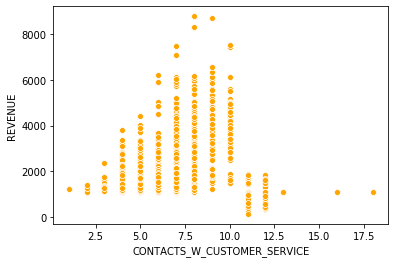

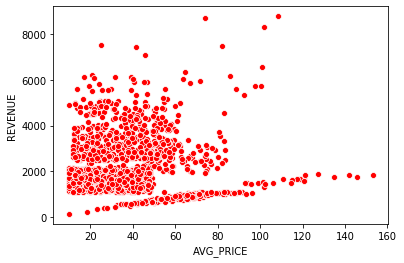

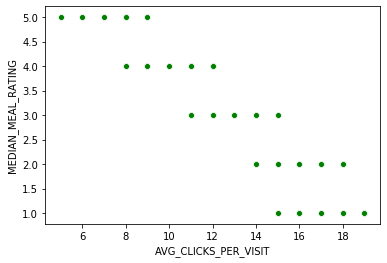

In [6]:
# # Visual explanatory data analysis with scatterplots

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
#                 y = original_df['REVENUE'],
#                 color = 'g')
# plt.xlabel('TOTAL_MEALS_ORDERED')

# ########################

# plt.subplot(2, 2, 2)
# sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
#                 y = original_df['REVENUE'],
#                 color = 'y')
# plt.xlabel('UNIQUE_MEALS_PURCH')

# ########################

# plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.show()

# ########################
# plt.subplot(2, 2, 4)
# sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
#                 y = original_df['REVENUE'],
#                 color = 'r')
# plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
# plt.tight_layout()
# #plt.savefig('original_df Data Scatterplots 1 of 5.png')
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
#                 y = original_df['REVENUE'],
#                 color = 'g')
# plt.xlabel('AVG_TIME_PER_SITE_VISIT')

# ########################

# plt.subplot(2, 2, 2)
# sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
#                 y = original_df['REVENUE'],
#                 color = 'y')
# plt.xlabel('CANCELLATIONS_BEFORE_NOON')

# ########################

# plt.subplot(2, 2, 3)
# sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')
# plt.xlabel('CANCELLATIONS_AFTER_NOON')

# ########################

# plt.subplot(2, 2, 4)
# sns.scatterplot(x = original_df['MOBILE_LOGINS'],
#                 y = original_df['REVENUE'],
#                 color = 'r')
# plt.xlabel('MOBILE_LOGINS')
# plt.tight_layout()
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = original_df['PC_LOGINS'],
#                 y = original_df['REVENUE'],
#                 color = 'y')
# plt.xlabel('PC_LOGINS')

# ########################

# plt.subplot(2, 2, 2)
# sns.scatterplot(x = original_df['WEEKLY_PLAN'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')
# plt.xlabel('WEEKLY_PLAN')

# ########################

# plt.subplot(2, 2, 3)
# sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
#                 y = original_df['REVENUE'],
#                 color = 'r')
# plt.xlabel('EARLY_DELIVERIES')

# ########################

# plt.subplot(2, 2, 4)
# sns.scatterplot(x = original_df['LATE_DELIVERIES'],
#                 y = original_df['REVENUE'],
#                 color = 'g')
# plt.xlabel('LATE_DELIVERIES')
# plt.tight_layout()
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
#                 y = original_df['REVENUE'],
#                 color = 'y')
# plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

# ########################

# plt.subplot(2, 2, 2)
# sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')
# plt.xlabel('AVG_PREP_VID_TIME')

# plt.subplot(2, 2, 3)
# sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
#                 y = original_df['REVENUE'],
#                 color = 'g')
# plt.xlabel('LARGEST_ORDER_SIZE')

# plt.subplot(2, 2, 4)
# sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
#                 y = original_df['REVENUE'],
#                 color = 'r')
# plt.xlabel('MASTER_CLASSES_ATTENDED')

# plt.tight_layout()
# plt.show()

# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
#                 y = original_df['REVENUE'],
#                 color = 'r')
# plt.xlabel('AVG_CLICKS_PER_VISIT')

# plt.subplot(2, 2, 2)
# sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
#                 y = original_df['REVENUE'],
#                 color = 'r')
# plt.xlabel('TOTAL_PHOTOS_VIEWED')

# plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_PRICE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_PRICE')
plt.show()

# plt.subplot(2, 2, 4)
# sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
#                 y = original_df['REVENUE'],
#                 color = 'r')
# plt.xlabel('MEDIAN_MEAL_RATING')
# plt.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
#                 y = chef['MEDIAN_MEAL_RATING'],
#                 color = 'g')
# plt.xlabel('AVG_CLICKS_PER_VISIT')
# plt.ylabel('MEDIAN_MEAL_RATING')
# plt.show()

sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['MEDIAN_MEAL_RATING'],
                color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')
plt.ylabel('MEDIAN_MEAL_RATING')
plt.show()

### Based on the visuals above, thresholds have been set.
 
- Based on the visuals, I have marked some outliers that will be marked as "1" in a new column for each feature.

In [7]:
median_meal_change_hi = 5
weekly_plan_change_zero = 0
master_class_change_hi=3
tot_photo_zero=0
larg_order_change_hi=7
cancel_a_change_hi = 3
cont_serv_change_hi = 8.5
#tot_meal_change_hi = 150
#uni_meal_change_lo = 1.5
#uni_meal_change_hi = 7.5
#cont_serv_change_lo = 3
# avg_time_vchanget_hi = 180
# cancel_b_change_lo = 2 
# mobile_login_change_lo=4.5
# mobile_login_change_hi=6.5
# pc_login_change_lo= 0.5
# pc_login_change_hi = 2.5
#weekly_plan_hi = 15
#early_deli_zero = 0
# late_deli_change_lo = 2.5
# late_deli_change_hi = 15.5
# recom_pct_zero = 0
#avg_prep_vid_change_hi = 200
# larg_order_change_lo=1
# master_class_change_lo=0
# avg_click_change_hi=9.5

# tot_photo_change_hi=360


# # TOTAL_MEALS_ORDERED
# original_df['change_Total_Meal'] = 0

# condition_hi = original_df.loc[0:, 'change_Total_Meal'][original_df['TOTAL_MEALS_ORDERED'] > tot_meal_change_hi] 

# original_df['change_Total_Meal'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

# # TOTAL_MEALS_ORDERED
# original_df['change_Uni_Meals'] = 0

# condition_lo = original_df.loc[0:, 'change_Uni_Meals'][original_df['UNIQUE_MEALS_PURCH'] < uni_meal_change_lo]
# condition_hi = original_df.loc[0:, 'change_Uni_Meals'][original_df['UNIQUE_MEALS_PURCH'] > uni_meal_change_hi] 

# original_df['change_Uni_Meals'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

# original_df['change_Uni_Meals'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)


# CONTACTS_W_CUSTOMER_SERVICE
original_df['change_Customer_Serv'] = 0

# condition_lo = original_df.loc[0:, 'change_Customer_Serv'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < cont_serv_change_lo]
condition_hi = original_df.loc[0:, 'change_Customer_Serv'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > cont_serv_change_hi] 

# original_df['change_Customer_Serv'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

original_df['change_Customer_Serv'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# # AVG_TIME_PER_SITE_VISIT
# original_df['change_Avg_Time'] = 0

# condition_hi = original_df.loc[0:, 'change_Avg_Time'][original_df['AVG_TIME_PER_SITE_VISIT'] > avg_time_vchanget_hi] 

# original_df['change_Avg_Time'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

# # CANCELLATIONS_BEFORE_NOON
# original_df['change_Cancel_B_Noon'] = 0

# condition_lo = original_df.loc[0:, 'change_Cancel_B_Noon'][original_df['CANCELLATIONS_BEFORE_NOON'] < cancel_b_change_lo] 


# original_df['change_Cancel_B_Noon'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

# CANCELLATIONS_AFTER_NOON
original_df['change_Cancel_A_Noon'] = 0

condition_hi = original_df.loc[0:, 'change_Cancel_A_Noon'][original_df['CANCELLATIONS_AFTER_NOON'] == cancel_a_change_hi] 


original_df['change_Cancel_A_Noon'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# # MOBILE_LOGINS
# original_df['change_Mobile_Login'] = 0

# condition_lo = original_df.loc[0:, 'change_Mobile_Login'][original_df['MOBILE_LOGINS'] < mobile_login_change_lo]
# condition_hi = original_df.loc[0:, 'change_Mobile_Login'][original_df['MOBILE_LOGINS'] > mobile_login_change_hi] 

# original_df['change_Mobile_Login'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

# original_df['change_Mobile_Login'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

# # PC_LOGINS
# original_df['change_PC_Login'] = 0

# condition_lo = original_df.loc[0:, 'change_PC_Login'][original_df['PC_LOGINS'] < pc_login_change_lo]
# condition_hi = original_df.loc[0:, 'change_PC_Login'][original_df['PC_LOGINS'] > pc_login_change_hi] 

# original_df['change_PC_Login'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

# original_df['change_PC_Login'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)


# WEEKLY_PLAN
original_df['change_Weekly_Plan'] = 0

condition_lo = original_df.loc[0:, 'change_Weekly_Plan'][original_df['WEEKLY_PLAN'] == weekly_plan_change_zero] 


original_df['change_Weekly_Plan'].replace(to_replace = condition_lo,
                                value   = 1,
                                inplace=True)

# # EARLY_DELIVERIES
# original_df['change_Early_Deliv'] = 0

# condition_lo = original_df.loc[0:, 'change_Early_Deliv'][original_df['EARLY_DELIVERIES'] > early_deli_zero] 


# original_df['change_Early_Deliv'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

# # LATE_DELIVERIES
# original_df['change_Late_Deliv'] = 0

# condition_lo = original_df.loc[0:, 'change_Late_Deliv'][original_df['LATE_DELIVERIES'] > late_deli_change_lo]
# condition_hi = original_df.loc[0:, 'change_Late_Deliv'][original_df['LATE_DELIVERIES'] > late_deli_change_hi] 


# original_df['change_Late_Deliv'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

# original_df['change_Late_Deliv'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

# # FOLLOWED_RECOMMENDATIONS_PCT
# original_df['change_Recommend_PCT'] = 0

# condition_lo = original_df.loc[0:, 'change_Recommend_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > recom_pct_zero] 


# original_df['change_Recommend_PCT'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)


# # AVG_PREP_VID_TIME
# original_df['change_Avg_Prep_Vid'] = 0

# condition_hi = original_df.loc[0:, 'change_Avg_Prep_Vid'][original_df['AVG_PREP_VID_TIME'] > avg_prep_vid_change_hi] 



# original_df['change_Avg_Prep_Vid'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

# # LARGEST_ORDER_SIZE
# original_df['change_Largest_Order'] = 0

# # condition_lo = original_df.loc[0:, 'change_Largest_Order'][original_df['LARGEST_ORDER_SIZE'] < larg_order_change_lo]
# condition_hi = original_df.loc[0:, 'change_Largest_Order'][original_df['LARGEST_ORDER_SIZE'] > larg_order_change_hi] 

# # original_df['change_Largest_Order'].replace(to_replace = condition_lo,
# #                                 value   = 1,
# #                                 inplace=True)

# original_df['change_Largest_Order'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)


# MASTER_CLASSES_ATTENDED
original_df['change_Master_Class'] = 0

# condition_lo = original_df.loc[0:, 'change_Master_Class'][original_df['MASTER_CLASSES_ATTENDED'] < master_class_change_lo]
condition_hi = original_df.loc[0:, 'change_Master_Class'][original_df['MASTER_CLASSES_ATTENDED'] == master_class_change_hi] 

# original_df['change_Master_Class'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

original_df['change_Master_Class'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

# AVG_CLICKS_PER_VISIT
# original_df['change_Avg_Click'] = 0

# condition_hi = original_df.loc[0:, 'change_Avg_Click'][original_df['AVG_CLICKS_PER_VISIT'] > avg_click_change_lo] 


# original_df['change_Avg_Click'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

# TOTAL_PHOTOS_VIEWED
original_df['change_Tot_Photo'] = 0

condition_lo = original_df.loc[0:, 'change_Tot_Photo'][original_df['TOTAL_PHOTOS_VIEWED'] == tot_photo_zero]
# condition_hi = original_df.loc[0:, 'change_Tot_Photo'][original_df['TOTAL_PHOTOS_VIEWED'] > tot_photo_change_hi] 

original_df['change_Tot_Photo'].replace(to_replace = condition_lo,
                                value   = 1,
                                inplace=True)

# original_df['change_Tot_Photo'].replace(to_replace = condition_hi,
#                                 value   = 1,
#                                 inplace=True)

original_df['change_Median_Rating'] = 0

# condition_lo = original_df.loc[0:, 'change_Master_Class'][original_df['MASTER_CLASSES_ATTENDED'] < master_class_change_lo]
condition_hi = original_df.loc[0:, 'change_Median_Rating'][original_df['MEDIAN_MEAL_RATING'] == median_meal_change_hi] 

# original_df['change_Master_Class'].replace(to_replace = condition_lo,
#                                 value   = 1,
#                                 inplace=True)

original_df['change_Median_Rating'].replace(to_replace = condition_hi,
                                value   = 1,
                                inplace=True)

## Start on modelling

- Starting of with making a copy of the original data frame, in order to create a data frame with the explanatory variables I want to use.
- Creating another data frame with the target variable.
- Train-test-splitting the data.

In [8]:
# creating dataframe for independent variables / explanatory variables
original_df_explanatory = original_df.copy()

original_df_explanatory = original_df_explanatory.drop(['REVENUE','out_Rev', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'domain'], axis = 1)

# target variable - dependent variable
original_df_target = original_df.loc[:, 'REVENUE']

#splitting into train/test
X_train, X_test, y_train, y_test = train_test_split(original_df_explanatory, 
                                                    original_df_target, 
                                                    test_size = 0.25, 
                                                    random_state = 222)

## Stat models to start off

- Starting with Stat models
- The displayed variables are the significant ones (might be affected after removing price variable. 

In [9]:
original_df_train = pd.concat([X_train, y_train], axis=1)

# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~original_df_train['TOTAL_MEALS_ORDERED'] + 
original_df_train['UNIQUE_MEALS_PURCH'] + 
original_df_train['CONTACTS_W_CUSTOMER_SERVICE'] + 
original_df_train['AVG_PREP_VID_TIME'] + 
original_df_train['LARGEST_ORDER_SIZE'] + 
original_df_train['MASTER_CLASSES_ATTENDED'] + 
original_df_train['MEDIAN_MEAL_RATING'] + 
original_df_train['TOTAL_PHOTOS_VIEWED'] + 
original_df_train['AVG_PRICE'] + 
original_df_train['out_Price'] + 
original_df_train['out_Total_Meal'] + 
original_df_train['out_Uni_Meals'] + 
original_df_train['out_Con_Cos_Serv'] + 
original_df_train['out_Master_Class'] +   
original_df_train['change_Customer_Serv'] + 
original_df_train['change_Master_Class'] + 
original_df_train['junk'] + 
original_df_train['personal'] + 
original_df_train['professional']""",
                                data = original_df_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     391.8
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:58:03   Log-Likelihood:                -11061.
No. Observations:                1459   AIC:                         2.216e+04
Df Residuals:                    1441   BIC:                         2.225e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

## Selecting significant variables 

- From the statmodels model, I select the significant variables to explore other regression models.
- Creating a new train-test-split based on significant variables.

In [23]:
org_exp = original_df.loc[:, ['TOTAL_MEALS_ORDERED' ,'UNIQUE_MEALS_PURCH' ,'CONTACTS_W_CUSTOMER_SERVICE' , 
'AVG_PREP_VID_TIME' , 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED' , 'MEDIAN_MEAL_RATING' ,
'TOTAL_PHOTOS_VIEWED', 'AVG_PRICE' , 'out_Price' , 'out_Total_Meal' , 'out_Uni_Meals' , 
'out_Con_Cos_Serv' , 'out_Master_Class' ,   'change_Customer_Serv' , 'change_Master_Class' , 
'junk' , 'personal' , 'professional']]

org_target = original_df.loc[:, 'REVENUE']

X_train, X_test, y_train, y_test = train_test_split(org_exp, 
                                                    org_target, 
                                                    test_size = 0.25, 
                                                    random_state = 222)

### Linear Regression

- Commented out for performance of the code.

Performance:
- Training Score: 0.822
- Testing Score: 0.815

In [29]:
# # running a normal linear regression

# lr = sklearn.linear_model.LinearRegression()

# # fitting model to training data
# lr_fit = lr.fit(X_train, y_train)

# # predicting testing data based on fitted training data.
# lr_pred = lr_fit.predict(X_test)

# # saving results
# lr_train_score = lr.score(X_train, y_train).round(3)
# lr_test_score = lr.score(X_test, y_test).round(3)

# # SCORING the results
# print('Training Score:', lr_train_score.round(3))
# print('Testing Score:',  lr_test_score.round(3))

Training Score: 0.822
Testing Score: 0.815


### Ridge Regression

- Commented out for performance of the code.

Performance:
- Training Score: 0.822
- Testing Score: 0.815

In [30]:
# # INSTANTIATING a model object
# ridge_model = sklearn.linear_model.Ridge()

# # FITTING the training data
# ridge_fit  = ridge_model.fit(X_train, y_train)


# # PREDICTING on new data
# ridge_pred = ridge_fit.predict(X_test)

# # saving scoring data for future use
# ridge_train_score = ridge_model.score(X_train, y_train).round(3)
# ridge_test_score  = ridge_model.score(X_test, y_test).round(3)

# print('Training Score:', ridge_train_score.round(3))
# print('Testing Score:',  ridge_test_score.round(3))

Training Score: 0.822
Testing Score: 0.815


### Lasso Regression

- Commented out for performance of the code.

Performance:
- Training Score: 0.822
- Testing Score: 0.815

In [31]:
# # INSTANTIATING a model object
# lasso_model = sklearn.linear_model.Lasso()

# # FITTING the training data
# lasso_fit = lasso_model.fit(X_train, y_train)


# # PREDICTING on new data
# lasso_pred = lasso_fit.predict(X_test)

# # saving scoring data for future use
# lasso_train_score = lasso_model.score(X_train, y_train).round(3)
# lasso_test_score  = lasso_model.score(X_test, y_test).round(3)

# print('Training Score:', lasso_train_score.round(3))
# print('Testing Score:',  lasso_test_score.round(3))

Training Score: 0.822
Testing Score: 0.815


## Hyperparameter Tuning 

- The next couple of cells will contain parameter tuning.
- This part is commented out in order to make the code run fast. 

In [14]:
# param_s = {'n_estimators': range(600,1100,50)}

# GSCV_1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, 
#                                                               min_samples_split = 500, 
#                                                               min_samples_leaf = 50, 
#                                                               max_depth=8, 
#                                                               random_state=222), 
#                       param_grid = param_s, 
#                       scoring='r2', 
#                       n_jobs =-1, 
#                       cv=5)

# GSCV_1.fit(X_train, y_train)

# GSCV_1.best_params_, GSCV_1.score(X_train, y_train).round(4), GSCV_1.score(X_test, y_test).round(4)

In [15]:
# param_s = {'max_depth': range(1, 10,1), 'min_samples_split': range(200,350, 20)}

# GSCV_2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate = 0.1, 
#                                                               n_estimators = 800, 
#                                                               random_state=222), 
#                         param_grid = param_s, 
#                         scoring = 'r2', 
#                         n_jobs=-1, 
#                         cv = 5)

# GSCV_2.fit(X_train, y_train)

# GSCV_2.best_params_,GSCV_2.score(X_train, y_train).round(4), GSCV_2.score(X_test, y_test).round(4)

In [16]:
# GSCV_2.best_estimator_

In [17]:
##### MAX FEATURES ENABLED DECREASE SCORE ON THIS DATASET, 
##### THIS SECTION HAS NOT BEEN USED IN THE ANALYSIS.

# param_s = {'max_features': range(1, 50, 5), 'min_samples_leaf':range(1,10,1)} # OLD MODEL min_samples_leaf = 4, min_samples_split = 190

#  GSCV_3 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, 
#                                                            n_estimators=800, 
#                                                            max_depth=3, 
#                                                            min_samples_split=300, 
#                                                            random_state = 222), 
#                        param_grid = param_s, 
#                        scoring = 'r2', 
#                        n_jobs=-1, 
#                        cv = 5)

# GSCV_3.fit(X_train, y_train)

# GSCV_3.best_params_, GSCV_3.score(X_train, y_train).round(4), GSCV_3.score(X_test, y_test).round(4)

In [18]:
# param_s = {'subsample': [0.5, 0.6, 0.7, 0.8, 0.85, 0.9,1]} 

# GSCV_4 = GridSearchCV(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
#                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=300,
#                           min_weight_fraction_leaf=0.0, n_estimators=800,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=222, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0, warm_start=False),
#                       param_grid=param_s, 
#                       scoring = 'r2', 
#                       n_jobs=-1,
#                       cv=5)

# GSCV_4.fit(X_train, y_train)

# GSCV_4.best_params_, GSCV_4.best_score_, GSCV_4.score(X_train, y_train).round(4), GSCV_4.score(X_test, y_test).round(4)

In [19]:
# param_s = {'learning_rate': [0.05, 0.1,0.15,0.2, 0.25,0.3]} 

# GSCV_5 = GridSearchCV(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
#                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=300,
#                           min_weight_fraction_leaf=0.0, n_estimators=800,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=222, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0, warm_start=False),
#                         param_grid=param_s, 
#                         scoring = 'r2', 
#                         n_jobs=-1,
#                         cv=5)

# GSCV_5.fit(X_train, y_train)

# GSCV_5.best_params_, GSCV_5.score(X_train, y_train).round(4), GSCV_5.score(X_test, y_test).round(4)

In [20]:
# GSCV_5.best_estimator_

## Winning model 

- Champion model, GradientBoostingRegressor

In [24]:
# INSTANTIATING a model object
GBR_final = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=300,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=222, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# FITTING the training data 
GBR_fit = GBR_final.fit(X_train, y_train)

# PREDICTING on new data
GBR_pred = GBR_fit.predict(X_test)

GBR_train_score = GBR_final.score(X_train, y_train).round(3)
GBR_test_score  = GBR_final.score(X_test, y_test).round(3)

print('Training Score:', GBR_train_score)
print('Testing Score:',  GBR_test_score)

Training Score: 0.999
Testing Score: 0.989


## Checking residual plot

- Checking this in order to make sure there is no strong pattern in the data points.
- There is a strong cluster around 1000-2000 region, and it scatters a lot afterwards. 
- The plot is not the greatest, but there is 

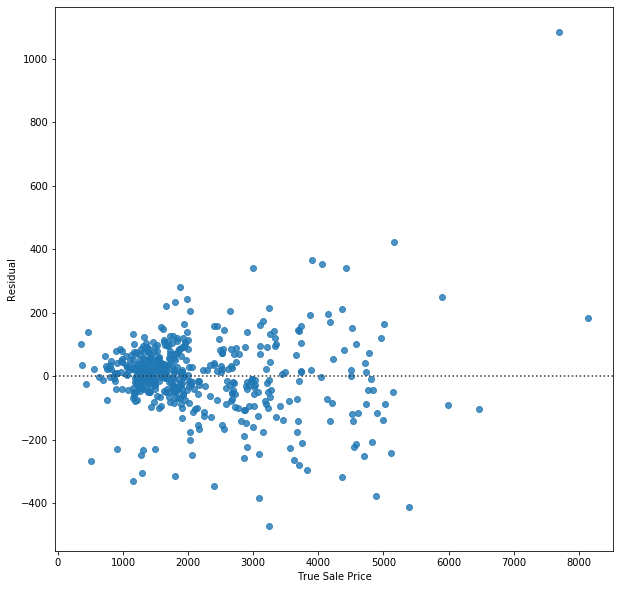

In [25]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))


# developing a residual plot
sns.residplot(x = GBR_pred,  # prediction values
              y = y_test) # actual values

# labels
plt.xlabel('True Sale Price')
plt.ylabel('Residual')

# saving figure in working directory
# plt.savefig("Housing Residual Plot.png")


# displaying the plot
plt.show()

end = time.time()
timer = end-start 